# Họ và tên: Bùi Quốc Thịnh
# Mã số sinh viên: 20520934

## Load library

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Load dataset

In [164]:
dataset = pd.read_csv("./Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [165]:
y = y.reshape(len(y), 1)

## Split dataset

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [167]:
print('LR init')
lr = LinearRegression()
lr.fit(X_train, y_train)

LR init


LinearRegression()

In [168]:
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test)

[[ 44275.9295499 ]
 [543473.58121331]]
[[ 60000]
 [500000]]


In [169]:
mse = mean_squared_error(y_test, y_pred)
print('mse:', mse)

mse: 1068599327.5148343


### Visualize linear regression

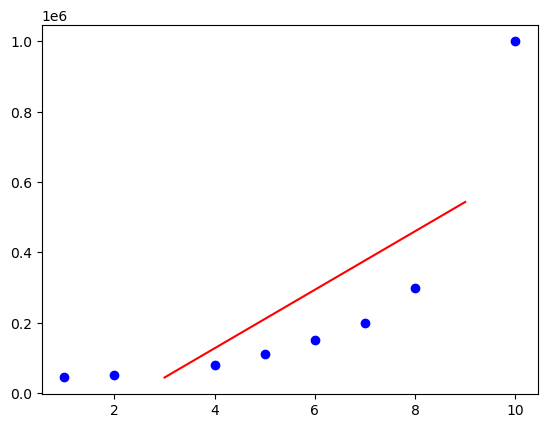

In [170]:
plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_test, y_pred, color= "red")
plt.show()

## Decision Tree

In [171]:
print('DT init')
dt =  DecisionTreeRegressor()
dt.fit(X_train, y_train)

DT init


DecisionTreeRegressor()

In [172]:
y_pred = dt.predict(X_test)
print(y_pred)
print(y_test)

[ 50000. 300000.]
[[ 60000]
 [500000]]


### Visualize decision tree

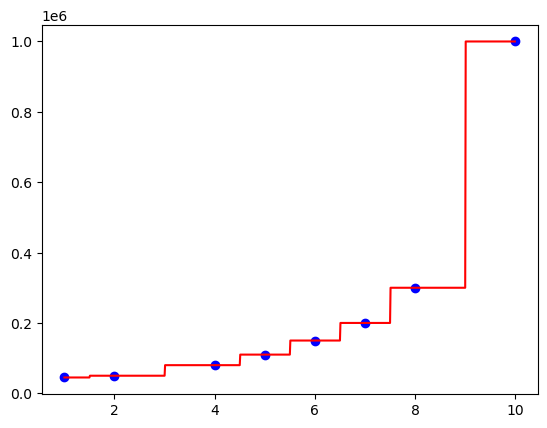

In [173]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_grid, dt.predict(X_grid), color= "red")
plt.show()

## Random Forest

In [174]:
print('RF init')
rf =  RandomForestRegressor()
rf.fit(X_train, y_train)

RF init


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21056\1889392034.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [175]:
y_pred = rf.predict(X_test)
print(y_pred)
print(y_test)

[ 56250. 453500.]
[[ 60000]
 [500000]]


### Visualize random forest

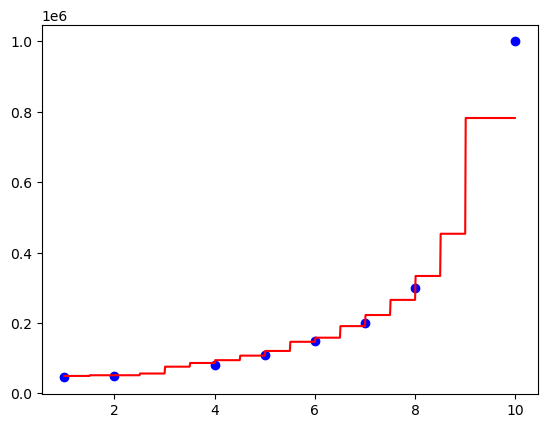

In [176]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_grid, rf.predict(X_grid), color= "red")
plt.show()

## SVR

In [177]:
print('SVR init')
sv =  SVR()
sv.fit(X_train, y_train)

SVR init


C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [178]:
y_pred = sv.predict(X_test)
print(y_pred)
print(y_test)

[129997.29257314 130002.2779053 ]
[[ 60000]
 [500000]]


### Visualize SVR

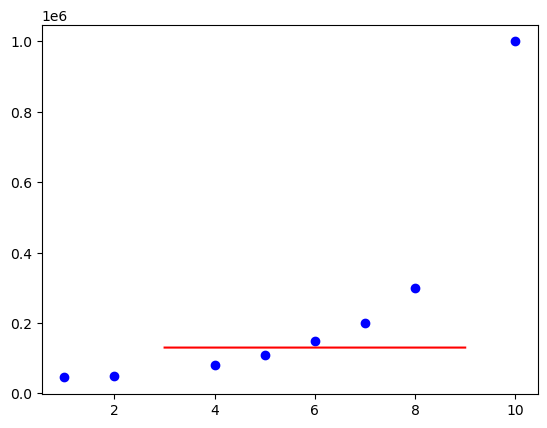

In [179]:
plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_test, y_pred, color= "red")
plt.show()

## SVR with Polynomial kernel

In [180]:
print('SVR init')
sv =  SVR(kernel="poly", C=100, degree=3, epsilon=0.1, coef0=1)
sv.fit(X_train, y_train)

SVR init


C:\Users\ASUS\anaconda3\envs\CS116\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, coef0=1, kernel='poly')

In [181]:
y_pred = sv.predict(X_test)
print(y_pred)
print(y_test)

[ 64579.09714866 349786.3127292 ]
[[ 60000]
 [500000]]


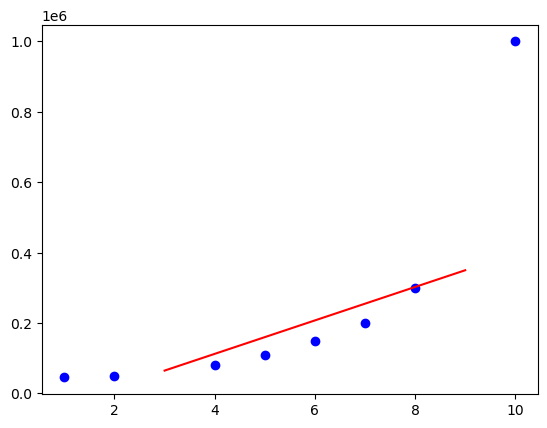

In [182]:
plt.scatter(X_train, y_train, color= "blue")
plt.plot(X_test, y_pred, color= "red")
plt.show()

## Polynomial Regression

In [183]:
print('Polynomial init')
poly = make_pipeline(PolynomialFeatures(6),LinearRegression())
poly.fit(X_train, y_train)

Polynomial init


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [184]:
print(f'score: {poly.score(X_test, y_test)}')

score: 0.995241927861826


In [185]:
X_seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
y_pred = poly.predict(X_seq)
print(y_pred)
print(y_test)

[[  44983.87421822]
 [  45322.86401311]
 [  45639.96890556]
 [  45936.35425406]
 [  46213.16156777]
 [  46471.5086777 ]
 [  46712.48990932]
 [  46937.17625624]
 [  47146.61555524]
 [  47341.8326625 ]
 [  47523.82963111]
 [  47693.58588978]
 [  47852.05842285]
 [  48000.18195148]
 [  48138.86911613]
 [  48269.01066031]
 [  48391.47561549]
 [  48507.11148734]
 [  48616.74444315]
 [  48721.17950055]
 [  48821.20071746]
 [  48917.57138323]
 [  49011.03421111]
 [  49102.31153193]
 [  49192.10548899]
 [  49281.09823423]
 [  49369.95212568]
 [  49459.30992606]
 [  49549.79500273]
 [  49642.01152879]
 [  49736.54468553]
 [  49833.96086601]
 [  49934.80787996]
 [  50039.61515993]
 [  50148.89396862]
 [  50263.13760753]
 [  50382.82162681]
 [  50508.40403637]
 [  50640.32551822]
 [  50779.00964008]
 [  50924.86307021]
 [  51078.27579352]
 [  51239.62132888]
 [  51409.2569477 ]
 [  51587.52389376]
 [  51774.74760427]
 [  51971.23793221]
 [  52177.28936982]
 [  52393.18127349]
 [  52619.17808974]


### Visualize polynomial regression

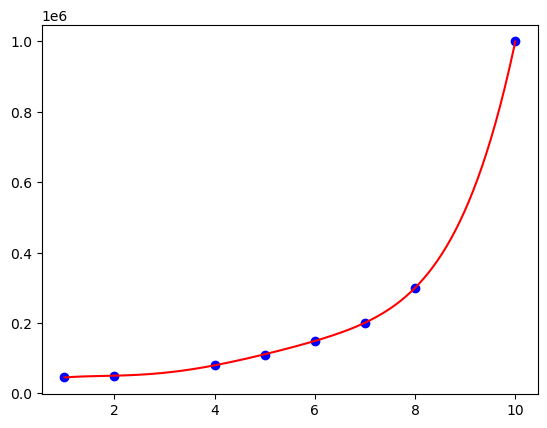

In [186]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_seq, y_pred, color='red')
plt.show()

## Comparision and comment

#### Chỉ có các mô hình Decision Tree Regression, Random Forest Regressor và Polynomial Regression đều hoạt động khá tốt với tập dataset Position_Salaries.csv, đặc biệt là mô hình Polynomial Regression hoạt động cực kì tốt. Còn các mô hình còn lại như Linear Regression, SVR, SVR với Polynomial kernel thì hoạt động khá kém